# Exercises for Lecture 7 (Training III)

In [1]:
import datetime
now = datetime.datetime.now()
print("Last executed: " + now.strftime("%Y-%m-%d %H:%M:%S"))

Last executed: 2022-01-25 09:21:58


In [2]:
# Common imports
import os
import numpy as np
np.random.seed(0) # To make this notebook's output stable across runs

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

Set up the training data.

(0.0, 3.0, 0.0, 4.0)

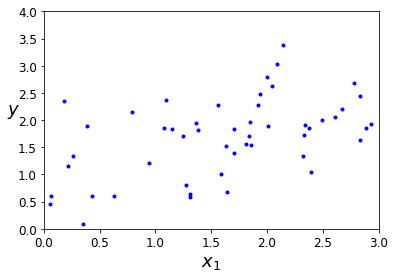

In [3]:
from sklearn.model_selection import train_test_split

m = 50
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)


plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 3, 0, 4])

## Exercise 1: Using Scikit-Learn, fit a polynomial of degree three using linear regression, and plot the predictions

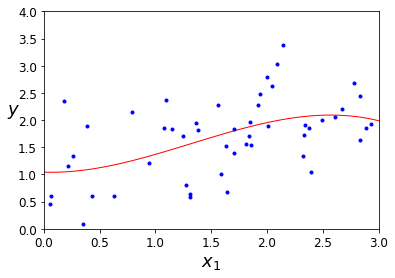

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

def plot_fitted_model(model): 
    y_new = model.predict(X_new)
    plt.plot(X_new, y_new, "r-", linewidth=1)
    plt.plot(X, y, "b.")
    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    plt.axis([0, 3, 0, 4])


polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression()),
))

polynomial_regression.fit(X, y)

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
plot_fitted_model(polynomial_regression)

## Exercise 2: Fit a polynomial of degree three using linear regression with Tikhonov regularization, and plot the predictions

Consider Ridge regularization parameter `alpha=1`.

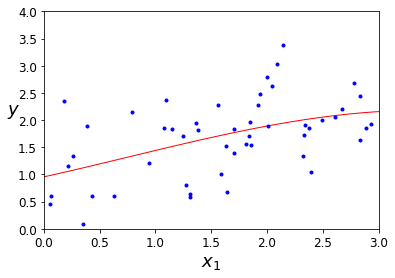

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge


ridge_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
    ("std_scaler", StandardScaler()),
    ("regul_reg", Ridge(alpha=1)),
))
    
ridge_regression.fit(X, y)

plot_fitted_model(ridge_regression)